# MUT Scraper
### A short tutorial for the MUTScraper module
#### Matt Johnson Jan 20, 2019

-------------

Available Position Options:
- WR
- RB
- QB
- FB
- TE
- OL (LT, LG, C, RG, RT)
- DB (SS, FS, CB)
- LB (ROLB, MLB, LOLB)
- DL (RE, DT, LE)
- ST (K, P)

In [11]:
# Import Libraries
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import plotly.plotly as py
import plotly.graph_objs as go
from ipywidgets import interactive, HBox, VBox, widgets, interact
from MUTScraper import Player, PlayerHandler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Input position, minimum overall, and date:
Click the link and get the number of pages (TODO: this is not great, fix).

Here we have chosen to look at Defensive Line (DL) players:

In [13]:
ph = PlayerHandler(position='DL', min_ovr=90, date='jan20')

Retrieve the number of pages...
https://www.muthead.com/19/players?filter-market=3&filter-ovr-min=90&filter-position=7168&page=1


#### Start Scraping
Calling handle_players(pages=numberOfPages) starts the scraping process:

In [14]:
ph.handle_players(pages=4)

 100 player links gathered.


#### Data
We now have the defensive attributes and traits for the players.<br>
Here is the DataFrame holding the player data:

In [15]:
pdf = ph.player_df
pdf.head()

,ACC,AGI,AWR,BKS,FNM,JMP,POW,PRC,PUR,PWM,...,DL Swim Move,High Motor,Penalty,Strips Ball,HtWt,OVR,Position,Team,Ht,Wt
Myles Garrett,92,85,91,95,85,95,92,91,98,95,...,Yes,No,Undisciplined,Yes,"Ht: 6' 4"" Wt: 272",97,RE,Cleveland Browns,76,272
Damon Harrison Sr,79,68,96,97,85,75,82,96,95,91,...,Yes,Yes,Disciplined,No,"Ht: 6' 3"" Wt: 350",96,DT,Detroit Lions,75,350
Ed Too Tall Jones,84,78,95,96,88,87,88,95,91,94,...,No,Yes,Norma,No,"Ht: 6' 9"" Wt: 271",96,LE,Dallas Cowboys,81,271
Bruce Smith,85,75,94,90,94,79,88,94,88,96,...,Yes,Yes,Norma,No,"Ht: 6' 4"" Wt: 262",96,RE,Buffalo Bills,76,262
Geno Atkins,84,71,96,96,86,75,72,96,91,94,...,No,Yes,Disciplined,Yes,"Ht: 6' 1"" Wt: 300",95,DT,Cincinnati Bengals,73,300


#### Variables

In [16]:
print(pdf.columns)

Index([ACC, AGI, AWR, BKS, FNM, JMP, POW, PRC, PUR, PWM, SPD, STR, TAK,
       'Big Hitter', 'DL Bull Rush Move', 'DL Spin Move', 'DL Swim Move',
       'High Motor', 'Penalty', 'Strips Ball', 'HtWt', 'OVR', 'Position',
       'Team', 'Ht', 'Wt'],
      dtype='object')


In [17]:
pdf.shape

(100, 26)

In [18]:
pdf.dtypes

ACC                   int64
AGI                   int64
AWR                   int64
BKS                   int64
FNM                   int64
JMP                   int64
POW                   int64
PRC                   int64
PUR                   int64
PWM                   int64
SPD                   int64
STR                   int64
TAK                   int64
Big Hitter           object
DL Bull Rush Move    object
DL Spin Move         object
DL Swim Move         object
High Motor           object
Penalty              object
Strips Ball          object
HtWt                 object
OVR                   int64
Position             object
Team                 object
Ht                    int64
Wt                    int64
dtype: object

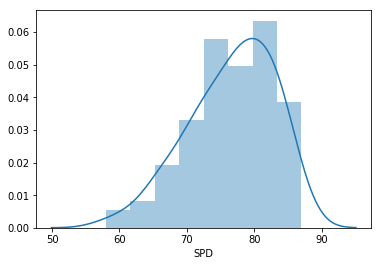

In [21]:
import seaborn as sns

sns.distplot(pdf['SPD']);

In [23]:
heavy = pdf[ pdf['Wt'] >= 300]
lighter = pdf[ pdf['Wt'] < 300]

fast = pdf[ pdf['SPD'] >= 80]
medium = pdf[ (pdf['SPD'] >= 70) & (pdf['SPD'] < 80)]
slow = pdf[ pdf['SPD'] < 70]

Grouping players by position:

In [24]:
position_groups = pdf.groupby('Position')

df_dict = {}

for name, group in position_groups:
    df_dict.update({name: group})

Method for filtering dataframe by an attributes rating:

In [20]:
def attribute_restriction(dat, attrib, rating):
    df = dat.copy()
    df = df[ df[attrib] >= rating]
    return df

### Visualization with Plotly 

In [28]:
#pdf2 = attribute_restriction(pdf, 'AGI', 87)
#pdf2 = attribute_restriction(pdf2, 'SPD', 85)

#df = pdf

color_map = {'LE': 'rgb(230,0,230)', 'DT': 'rgb(230,230,230)', 'RE': 'rgb(240,5,30)'}

attrib_list = ['SPD', 'BKS', 'PWM', 'Wt', 'STR', 'FNM', 'TAK', 'Ht']

def get_trace(pos, df0):

    trace = go.Splom(dimensions=[dict(label=attrib, values=df0[attrib]) for attrib in attrib_list],
                text=df0.index.values,
                name=pos,
                marker=dict(size=5,
                            showscale=False,
                            line=dict(width=0.5,
                                      color=color_map.get(pos)))
                )
    return trace

In [33]:
# Trace
traces = []

for pos in ['LE', 'DT', 'RE']:
    traces.append( get_trace(pos, df_dict.get(pos)))

# Axis
axis = dict(showline=True,
          zeroline=False,
          gridcolor='#fff',
          ticklen=4)

layout = go.Layout(
    title='MUT19 Defensive Lineman (90+ OVR)',
    dragmode='select',
    width=1000,
    height=800,
    autosize=False,
    hovermode='closest',
    plot_bgcolor='rgba(240,240,240, 0.95)',
    xaxis1=dict(axis), xaxis2=dict(axis), xaxis3=dict(axis), xaxis4=dict(axis),
    xaxis5=dict(axis), xaxis6=dict(axis), xaxis7=dict(axis), xaxis8=dict(axis),
    yaxis1=dict(axis), yaxis2=dict(axis), yaxis3=dict(axis), yaxis4=dict(axis),
    yaxis5=dict(axis), yaxis6=dict(axis), yaxis7=dict(axis), yaxis8=dict(axis)
)

for trace in traces:
    trace['diagonal'].update(visible=False)
    trace['showupperhalf']=False

fig = dict(data=traces, layout=layout)

py.iplot(fig)

### Correlation between Variables:
We can see a correlation of 1 between PRC and AWR and -0.8 between SPD and Wt.

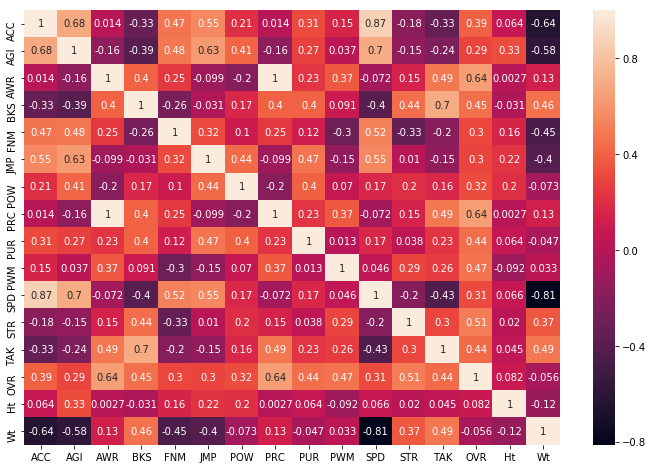

In [32]:
plt.subplots(figsize=(12,8))
sns.heatmap(pdf.corr(), annot=True);